In [1]:
import seaborn as sns
from collections import Counter

In [2]:
class DescriptiveStatistics:
    def __init__(self, data):
        self.data = data
        self.length = len(self.data)

    def mean(self):
        total = sum(self.data)
        mean = total/self.length
        
        return mean

    def median(self):
        if self.length % 2 == 1:
            median_index = int(self.length/2) 
            median = self.data[median_index]
        else:
            median_indexes = int(self.length/2) - 1, int(self.length/2)
            median = (self.data[median_indexes[0]] + self.data[median_indexes[1]]) / 2
            
        return median

    def mode(self):
        count_of_data = Counter(self.data)
        count_of_data = {val: key for key, val in count_of_data.items()}
        max_count = max(count_of_data)
        mode = count_of_data[max_count]
        
        return mode

    def range(self):
        return max(self.data) - min(self.data)

    def variance(self):
        variance_of_data = []
        for ele in self.data:
            variance = (ele - self.mean()) ** 2
            variance_of_data.append(variance)
        variance = sum(variance_of_data)/len(variance_of_data)
        return variance

    def std_dev(self):
        return self.variance() ** (1/2)

    def get_val_iqr(self):
        q2_of_data = self.median()
    
        q1_of_data = [ele for ele in self.data if ele < q2_of_data]
        temp = DescriptiveStatistics(q1_of_data)
        q1_median = temp.median()
    
        q3_of_data = [ele for ele in self.data if ele > q2_of_data]
        temp = DescriptiveStatistics(q3_of_data)
        q3_median = temp.median()

        return q1_median, q2_of_data, q3_median
        
    def iqr(self):
        q1_median, q2_median, q3_median = self.get_val_iqr()
        iqr = q3_median - q1_median

        return iqr

    def percentile(self, val):
        index = (val / 100) * self.length
        return self.data[int(index)]

    def plot_hist(self):
        return sns.histplot(self.data, color="Aquamarine")

    def plot_box(self):
        return sns.boxplot(self.data, color="Aquamarine")

    def plot_kde(self):
        return sns.kdeplot(self.data, fill=True, color="Aquamarine")

    def clean_iqr(self):
        q1_median, q2_median, q3_median = self.get_val_iqr()
        iqr = self.iqr()
        q1 = self.percentile(25)
        q3 = self.percentile(75)
        lw = max(min(self.data), q1_median - 1.5 * iqr)
        uw = min(max(self.data), q3_median + 1.5 * iqr)
        self.data = [ele for ele in self.data if lw <= ele <=uw]
        self.length = len(self.data)

    def desc(self):
        description = f"""
        Mean: {self.mean()}
        Median: {self.median()}
        Mode: {self.mode()}
        Range: {self.range()}
        Variance: {self.variance()}
        Standard Deviation: {self.std_dev()}
        Iqr: {self.iqr()}
        25th Percentile: {self.percentile(25)}
        50th Percentile: {self.percentile(50)}
        75th Percentile: {self.percentile(75)}"""
        
        print(description)

In [3]:
data = [12, 14, 15, 15, 16, 17, 18, 19, 20, 21, 21, 22, 22, 23, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 200, 215, 250]
obj = DescriptiveStatistics(data)

<Axes: ylabel='Density'>

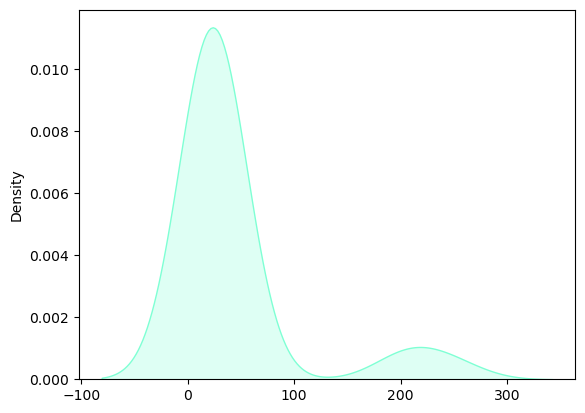

In [4]:
obj.plot_kde()

<Axes: >

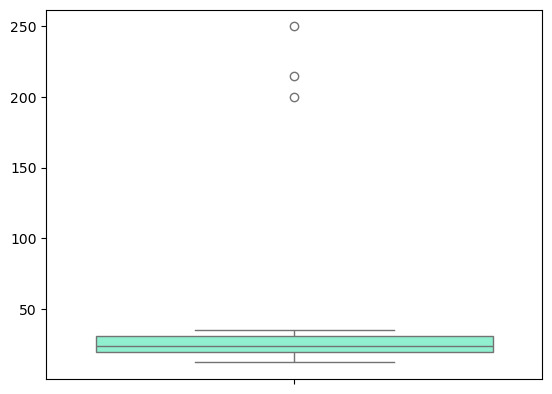

In [5]:
obj.plot_box()

In [6]:
obj.clean_iqr()

<Axes: ylabel='Density'>

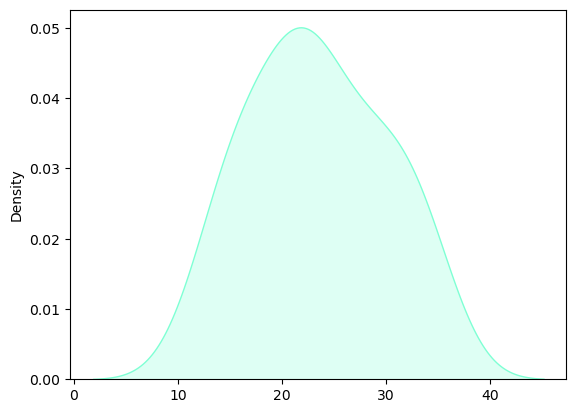

In [7]:
obj.plot_kde()

<Axes: >

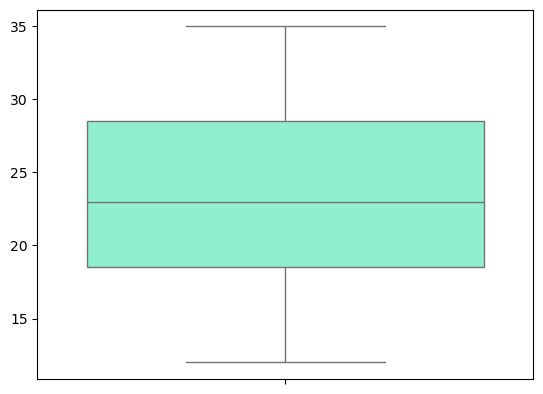

In [8]:
obj.plot_box()

In [9]:
obj.desc()


        Mean: 23.40740740740741
        Median: 23
        Mode: 23
        Range: 23
        Variance: 41.50068587105624
        Standard Deviation: 6.4421025970607015
        Iqr: 11.5
        25th Percentile: 18
        50th Percentile: 23
        75th Percentile: 29
